In [18]:
## Standard Atmosphere plot of radar beam height.
## 
## All values are metric until we convert to feet and nautical miles at the conclusion.
##
## This program plots a single elevation from a selected VCP. The upper, Center and Lower beam are calculated.
##
## Written by Paul MCCRONE, NOAA/NWS/Radar Operations Center Field Requirements Branch
## June 1, 2022

In [19]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
    
except:
    print('Error loading modules')

In [20]:
# H=       Height of the Beam Centerline above sea level
# H0=      Height of the radar above sea  level = STE + TWR_HT
# STE=     Station elevation
# TWR_HT=  Tower Height
# R=       Range (distance) to target in km
# PHi=     elevation angles of beam in degrees
# Re=      Radus of Earth = 6374 km

#
# H = SQRT ( R^2 +((4/3)Re + H0)^2  +2R((4/3)Re+H0)sin(PHi)-(4/3)Re )
#

VCP = 212

Beam="Center "

Beam_Value=0.48
##
## Set the Beam Value to 0.0 for Center Beam only
## The current setting is 0.48 because we want the upper and lower beam, and that is 0.96

Re=6374.0
#(The earth Radius is in km)

# WE will assume VCP 212- 
PHi212=[0.5, 0.9, 1.3, 1.8, 2.4, 3.1, 4, 5.1, 6.4, 8, 10, 12.5, 15.6, 19.5]
PHi212a=np.array(PHi212)

PHi212lower=np.array(PHi212)-Beam_Value

PHi212upper=np.array(PHi212)+Beam_Value

print("Phi, the angles of elev for VCP"+str(VCP)+" are ", str(PHi212a))

Phi, the angles of elev for VCP212 are  [ 0.5  0.9  1.3  1.8  2.4  3.1  4.   5.1  6.4  8.  10.  12.5 15.6 19.5]


In [21]:
PHi212rad=np.radians(PHi212a)

PHi212Lrad=np.radians(PHi212lower)
PHi212Urad=np.radians(PHi212upper)

print("In Radians", str(PHi212rad))

PHi=PHi212rad
PHi_angle=PHi212
PHiU=PHi212Urad
PHiL=PHi212Lrad

In Radians [0.00872665 0.01570796 0.02268928 0.03141593 0.0418879  0.05410521
 0.06981317 0.08901179 0.11170107 0.13962634 0.17453293 0.21816616
 0.27227136 0.3403392 ]


In [22]:
R= np.arange(0.1,460.1,0.1)
R

array([1.000e-01, 2.000e-01, 3.000e-01, ..., 4.598e+02, 4.599e+02,
       4.600e+02])

In [23]:
len(R)

4600

In [24]:
RSQ=R**2


In [25]:
RSQ

array([1.0000000e-02, 4.0000000e-02, 9.0000000e-02, ..., 2.1141604e+05,
       2.1150801e+05, 2.1160000e+05])

In [26]:
len(RSQ)

4600

In [27]:
r43=4.0/3.0

STE= 200.0#meters
TWR_HT=32.0#meters

H0m=STE+TWR_HT#mter
H0=H0m/1000.0 #Convert to km
#pri

In [28]:
print("H0= "+str(H0))

H0= 0.232


No handles with labels found to put in legend.


angle in radians:0.015707963267948967
angle in degrees:0.9
BB:37378.57148433603
CC:8498.666666666666
Hrr:3.583454198562322
HH=11756.73987281121


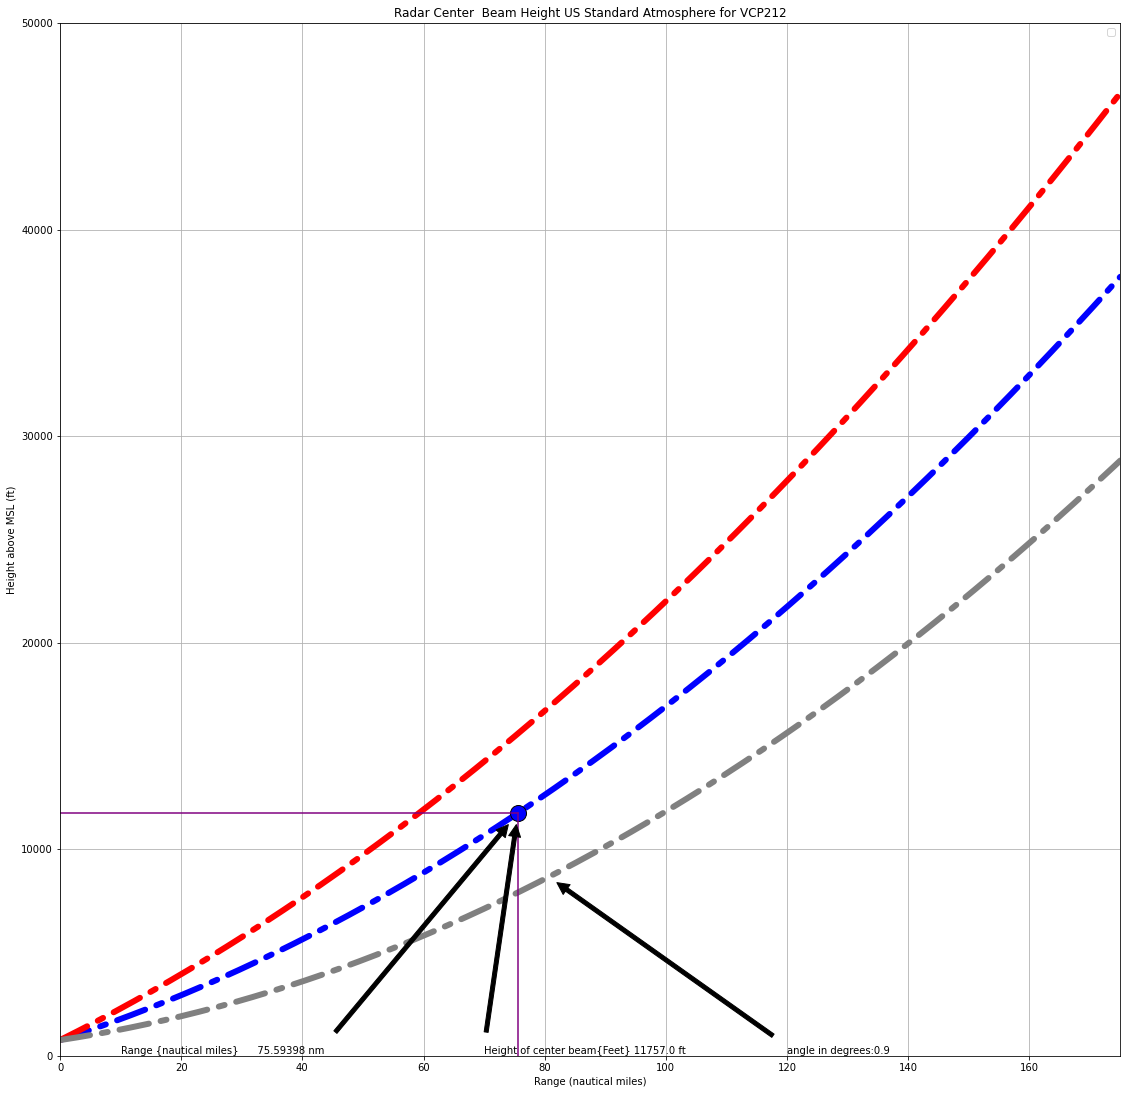

In [29]:
fig, ax = plt.subplots(figsize=(19,19))

#ax.plot(t, s)

#Note, R is n km.
Rnm = R*0.539957 #nautcal miles


xupperlimit=175.0
yupperlimit=50000

## First plot Center beam
#counter=0
#for angle in PHi:
#
#    AA=(r43*Re)+H0
#    BB=2*R*(r43*Re+H0)*np.sin(angle)
#    CC=r43*Re
#
#    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
#    H=Hr*3280.84
#    # 3280.84 converts to feet
#    ax.plot(Rnm,H, label=str(PHi_angle[counter]))
#    plt.xlim((0,xupperlimit))
#    plt.ylim((0,yupperlimit))
#    counter=counter+1
    
## Then plot upper beam
#for angle in PHiU:
#
#    AA=(r43*Re)+H0
#    BB=2*R*(r43*Re+H0)*np.sin(angle)
#    CC=r43*Re
#
#    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
#    H=Hr*3280.84
#    # 3280.84 converts to feet
#    ax.plot(Rnm,H, color='black')
#    plt.xlim((0,xupperlimit))
#    plt.ylim((0,yupperlimit))
    


## Plot lower beam
#    
#for angle in PHiL:
#
#    AA=(r43*Re)+H0
#    BB=2*R*(r43*Re+H0)*np.sin(angle)
#    CC=r43*Re
#    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
#    H=Hr*3280.84
#    # 3280.84 converts to feet
#    ax.plot(Rnm,H, color='grey',linewidth=2, linestyle=':')
#    plt.xlim((0,xupperlimit))
#    plt.ylim((0,yupperlimit))

#Plot the first elevation of the VCP (blue dashed)  

angle_index=1

try: 
    angle=PHi[angle_index]

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, color='blue',linestyle=(0, (5, 2, 1, 2)), linewidth=6,dash_capstyle='round')
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))
except:
    print("try") 
    
#Now show the 0.98 degree angle (red dashed).    
try: 
    angle=PHiU[angle_index]

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, color='red',linestyle=(0, (5, 2, 1, 2)), linewidth=6,dash_capstyle='round')
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))
except:
    print("try")
    
#Now show the 0.48 degree angle (red dashed).    
try: 
    angle=PHiL[angle_index]

    AA=(r43*Re)+H0
    BB=2*R*(r43*Re+H0)*np.sin(angle)
    CC=r43*Re

    Hr=np.emath.sqrt(RSQ+(AA*AA)+BB)-CC
    H=Hr*3280.84
    # 3280.84 converts to feet
    ax.plot(Rnm,H, color='grey',linestyle=(0, (5, 2, 1, 2)), linewidth=6,dash_capstyle='round')
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))
except:
    print("try")
    
    
plt.annotate('angle in degrees:'+str(PHi212[angle_index]), xy=(80, 8800), xytext=(120, 100), 
             arrowprops=dict(facecolor='black', shrink=0.05),
            )

### Determine the Center, upper and lower beam height for a particulat range in km
#
#Change the value of RRR to determine the location of the radar emissio

RRR=140.0 # in km

RRRnm=RRR*0.539957 #nautcal miles

try: 

    #---------------

    angle=PHi[angle_index]
    print('angle in radians:'+str(angle))
    print('angle in degrees:'+str(PHi212[angle_index]))
    AA = (r43*Re)+H0
    BB=2*RRR*(r43*Re+H0)*np.sin(angle)
    print("BB:"+str(BB))      
    CC=r43*Re
    print("CC:"+str(CC))      
    Hrr=np.emath.sqrt(RRR**2+(AA*AA)+BB)-CC
    print("Hrr:"+str(Hrr))      
    HH=Hrr*3280.84
    print("HH="+str(HH))
    plt.plot(RRRnm, HH, marker="o", markersize=16, markeredgecolor="black", markerfacecolor="blue")
    # Draw lines
    my_y_l   =[HH,HH]
    my_x_line=[0,RRRnm]
    plt.plot(my_x_line,my_y_l, color='purple',markersize=12)
    my_y_l2   =[0,HH]
    my_x_line2=[RRRnm,RRRnm]
    plt.plot(my_x_line2,my_y_l2, color='purple',markersize=12)
    plt.xlim((0,xupperlimit))
    plt.ylim((0,yupperlimit))

    point="Location of Interest"
    nmnm= "Range {nautical miles}      "+str(RRRnm)+' nm'
    hhkm= "Height of center beam{Feet} "+str(np.around(HH))+' ft'
    
    plt.annotate(nmnm, xy=(RRRnm, HH), xytext=(10, 100), 
             arrowprops=dict(facecolor='black', shrink=0.05),
            )
    plt.annotate(hhkm, xy=(RRRnm, HH), xytext=(70, 100), 
             arrowprops=dict(facecolor='black', shrink=0.05),
            )

    
except:
    print("try")





ax.set(xlabel='Range (nautical miles)', ylabel='Height above MSL (ft)',title='Radar '+str(Beam)+' Beam Height US Standard Atmosphere for VCP'+str(VCP))

ax.grid()

file="VCP"+str(VCP)+"ray.png"

fig.savefig(file)
plt.legend()
plt.show()

In [30]:
#RRR=80.0 # in km
#RRRnm=RRR*0.539957 #nautcal miles
#angle=PHi[0]
#print('angle:'+str(angle))
#AA = (r43*Re)+H0
#BB=2*RRR*(r43*Re+H0)*np.sin(angle)
#CC=r43*Re
#print("CC:"+str(CC))      
##Hrr=np.emath.sqrt(RSQ[0]+(AA*AA)+BB)-CC
#Hrr=np.emath.sqrt(RRR**2+(AA*AA)+BB)-CC
#HH=Hrr*3280.84
#print("HH="+str(HH))

In [31]:
try: 

    #------------------
    # Print upper beam 
    angle=PHiU[angle_index]
    print('angle in radians:'+str(angle))
    print('angle in degrees:'+str(PHi212[angle_index]))
    AA = (r43*Re)+H0
    BB=2*RRR*(r43*Re+H0)*np.sin(angle)
    print("BB:"+str(BB))      
    CC=r43*Re
    print("CC:"+str(CC))      
    Hrr=np.emath.sqrt(RRR**2+(AA*AA)+BB)-CC
    print("Hrr:"+str(Hrr))      
    HH=Hrr*3280.84
    print("HH="+str(HH))
    #plt.plot(RRRnm, HH, marker="o", markersize=16, markeredgecolor="black", markerfacecolor="blue")
    ## Draw lines
    #my_y_l   =[HH,HH]
    #my_x_line=[0,RRRnm]
    #plt.plot(my_x_line,my_y_l, color='purple',markersize=12)
    my_y_l2   =[0,HH]
    my_x_line2=[RRRnm,RRRnm]
    #plt.plot(my_x_line2,my_y_l2, color='purple',markersize=12)
    #plt.xlim((0,xupperlimit))
    #plt.ylim((0,yupperlimit))

    point="Upper Beam at Location of Interest"
    nmnm= "Range {nautical miles}      "+str(RRRnm)+' nm'
    hhkm= "Height of center beam{Feet} "+str(np.around(HH))+' ft'
    
    #plt.annotate(nmnm, xy=(RRRnm, HH), xytext=(10, 100), 
    #         arrowprops=dict(facecolor='black', shrink=0.05),
    #        )
    #plt.annotate(hhkm, xy=(RRRnm, HH), xytext=(70, 100), 
    #         arrowprops=dict(facecolor='black', shrink=0.05),
    #        )

    
except:
    print("try")


angle in radians:0.024085543677521744
angle in degrees:0.9
BB:57310.62512766551
CC:8498.666666666666
Hrr:4.755536857988773
HH=15602.155545163885


In [33]:
print(point)
print("Range {Km}                  "+str(RRR)+' km')
print("Range {nautical miles}      "+str(RRRnm)+' nm')
print("Height of upper beam{Feet} "+str(HH)+' ft')
#

Upper Beam at Location of Interest
Range {Km}                  140.0 km
Range {nautical miles}      75.59398 nm
Height of upper beam{Feet} 15602.155545163885 ft


In [34]:
try: 

    #---------------

    angle=PHi[angle_index]
    print('angle in radians:'+str(angle))
    print('angle in degrees:'+str(PHi212[angle_index]))
    AA = (r43*Re)+H0
    BB=2*RRR*(r43*Re+H0)*np.sin(angle)
    print("BB:"+str(BB))      
    CC=r43*Re
    print("CC:"+str(CC))      
    Hrr=np.emath.sqrt(RRR**2+(AA*AA)+BB)-CC
    print("Hrr:"+str(Hrr))      
    HH=Hrr*3280.84
    print("HH="+str(HH))
    #plt.plot(RRRnm, HH, marker="o", markersize=16, markeredgecolor="black", markerfacecolor="blue")
    ## Draw lines
    #my_y_l   =[HH,HH]
    #my_x_line=[0,RRRnm]
    #plt.plot(my_x_line,my_y_l, color='purple',markersize=12)
    my_y_l2   =[0,HH]
    my_x_line2=[RRRnm,RRRnm]
    #plt.plot(my_x_line2,my_y_l2, color='purple',markersize=12)
    #plt.xlim((0,xupperlimit))
    #plt.ylim((0,yupperlimit))

    point="Center Beam at the Location of Interest"
    nmnm= "Range {nautical miles}      "+str(RRRnm)+' nm'
    hhkm= "Height of center beam{Feet} "+str(np.around(HH))+' ft'
    
    #plt.annotate(nmnm, xy=(RRRnm, HH), xytext=(10, 100), 
    #         arrowprops=dict(facecolor='black', shrink=0.05),
    #        )
    #plt.annotate(hhkm, xy=(RRRnm, HH), xytext=(70, 100), 
    #         arrowprops=dict(facecolor='black', shrink=0.05),
    #        )

    
except:
    print("try")


angle in radians:0.015707963267948967
angle in degrees:0.9
BB:37378.57148433603
CC:8498.666666666666
Hrr:3.583454198562322
HH=11756.73987281121


In [35]:
print(point)
print("Range {Km}                  "+str(RRR)+' km')
print("Range {nautical miles}      "+str(RRRnm)+' nm')
print("Height of center beam{Feet} "+str(HH)+' ft')
#

Center Beam at the Location of Interest
Range {Km}                  140.0 km
Range {nautical miles}      75.59398 nm
Height of center beam{Feet} 11756.73987281121 ft


In [36]:
try: 

    #------------------
    # Print Lower beam 
    angle=PHiL[angle_index]
    print('angle in radians:'+str(angle))
    print('angle in degrees:'+str(PHi212[angle_index]))
    AA = (r43*Re)+H0
    BB=2*RRR*(r43*Re+H0)*np.sin(angle)
    print("BB:"+str(BB))      
    CC=r43*Re
    print("CC:"+str(CC))      
    Hrr=np.emath.sqrt(RRR**2+(AA*AA)+BB)-CC
    print("Hrr:"+str(Hrr))      
    HH=Hrr*3280.84
    print("HH="+str(HH))
    #plt.plot(RRRnm, HH, marker="o", markersize=16, markeredgecolor="black", markerfacecolor="blue")
    ## Draw lines
    #my_y_l   =[HH,HH]
    #my_x_line=[0,RRRnm]
    #plt.plot(my_x_line,my_y_l, color='purple',markersize=12)
    my_y_l2   =[0,HH]
    my_x_line2=[RRRnm,RRRnm]
    #plt.plot(my_x_line2,my_y_l2, color='purple',markersize=12)
    #plt.xlim((0,xupperlimit))
    #plt.ylim((0,yupperlimit))

    point="Lower Beam at Location of Interest"
    nmnm= "Range {nautical miles}      "+str(RRRnm)+' nm'
    hhkm= "Height of center beam{Feet} "+str(np.around(HH))+' ft'
    
    #plt.annotate(nmnm, xy=(RRRnm, HH), xytext=(10, 100), 
    #         arrowprops=dict(facecolor='black', shrink=0.05),
    #        )
    #plt.annotate(hhkm, xy=(RRRnm, HH), xytext=(70, 100), 
    #         arrowprops=dict(facecolor='black', shrink=0.05),
    #        )

    
except:
    print("try")


angle in radians:0.007330382858376185
angle in degrees:0.9
BB:17443.894484163913
CC:8498.666666666666
Hrr:2.411055643169675
HH=7910.287796336797


In [37]:
print(point)
print("Range {Km}                  "+str(RRR)+' km')
print("Range {nautical miles}      "+str(RRRnm)+' nm')
print("Height of lower beam{Feet} "+str(HH)+' ft')
#

Lower Beam at Location of Interest
Range {Km}                  140.0 km
Range {nautical miles}      75.59398 nm
Height of lower beam{Feet} 7910.287796336797 ft


array([ 1.19400059,  1.19400235,  1.19400529, ..., 13.6213567 ,
       13.62675889, 13.63216225])